In [1]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [2]:
jury = Table(["Race", "Eligible", "Panel"]).with_rows([
    ["Asian",  0.15, 0.26],
    ["Black",  0.18, 0.08],
    ["Latino", 0.12, 0.08],
    ["White",  0.54, 0.54],
    ["Other",  0.01, 0.04],
    ])
jury.set_format([1, 2], PercentFormatter(0))

Race,Eligible,Panel
Asian,15%,26%
Black,18%,8%
Latino,12%,8%
White,54%,54%
Other,1%,4%


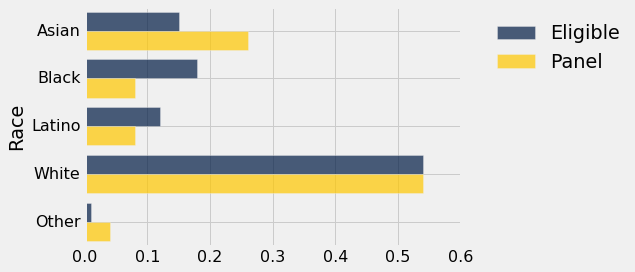

In [3]:
jury.barh('Race')

## Total Variation Distance

In [4]:
jury.append_column("Difference", jury.column("Panel") - jury.column("Eligible"))
jury.append_column("Abs. Difference", np.abs(jury.column("Difference")))
jury.set_format([3, 4], PercentFormatter(0))

Race,Eligible,Panel,Difference,Abs. Difference
Asian,15%,26%,11%,11%
Black,18%,8%,-10%,10%
Latino,12%,8%,-4%,4%
White,54%,54%,0%,0%
Other,1%,4%,3%,3%


In [5]:
sum(jury.column(4)) / 2

0.14000000000000001

In [6]:
def total_variation_distance(column, other):
    return sum(np.abs(column - other)) / 2

def table_tvd(table, label, other):
    return total_variation_distance(table.column(label), table.column(other))

In [7]:
table_tvd(jury, 'Eligible', 'Panel')

0.14000000000000001

## Multinomial

In [8]:
np.random.randint(1, 7)

6

In [9]:
np.random.normal()

-0.5202780983776301

In [10]:
np.random.multinomial(1, [0.5, 0.5])

array([0, 1])

In [11]:
np.random.multinomial(50, [0.5, 0.5])

array([26, 24])

In [12]:
np.random.multinomial(1000, [0.5, 0.5])

array([495, 505])

In [13]:
np.random.multinomial(1000, np.array([1, 1, 1, 1, 1, 1])/6)

array([163, 156, 163, 165, 168, 185])

In [14]:
eligible = jury.column('Eligible')
eligible

array([ 0.15,  0.18,  0.12,  0.54,  0.01])

In [15]:
np.random.multinomial(1, eligible)

array([0, 0, 0, 1, 0])

In [16]:
sample_size = 1453
random_panel = np.random.multinomial(sample_size, eligible)
random_panel

array([230, 270, 170, 769,  14])

In [17]:
sum(random_panel)

1453

In [18]:
random_panel / sample_size

array([ 0.15829319,  0.18582244,  0.11699931,
        0.52924983,  0.00963524])

## Comparison

In [19]:
sampled = jury.select(['Race', 'Eligible', 'Panel']).with_column(
    'Random Panel', random_panel / sample_size)
sampled.set_format(3, PercentFormatter(0))

Race,Eligible,Panel,Random Panel
Asian,15%,26%,16%
Black,18%,8%,19%
Latino,12%,8%,12%
White,54%,54%,53%
Other,1%,4%,1%


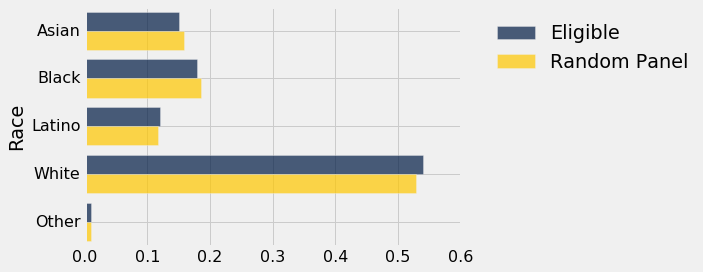

In [20]:
sampled.barh('Race', [1, 3])

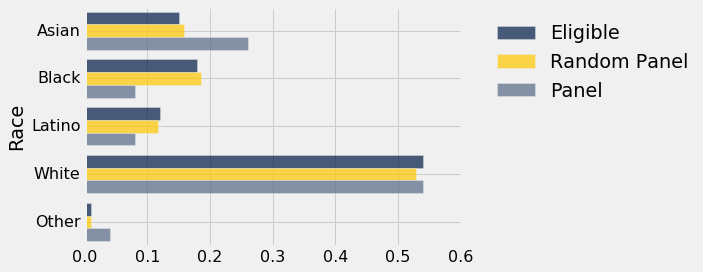

In [21]:
sampled.barh('Race', [1, 3, 2])

In [22]:
table_tvd(sampled, 'Eligible', 'Random Panel')

0.0141156228492774

In [23]:
distribution = jury.column('Eligible')
tvds = Table(["TVD from a random sample"])

for i in np.arange(1000):
    sample = np.random.multinomial(sample_size, distribution) 
    tvd = total_variation_distance(sample / sample_size, distribution)
    tvds.append([tvd])

tvds

TVD from a random sample
0.0155678
0.010585
0.0161459
0.0105368
0.0148451
0.00609085
0.0182244
0.0326084
0.00855471
0.0137509


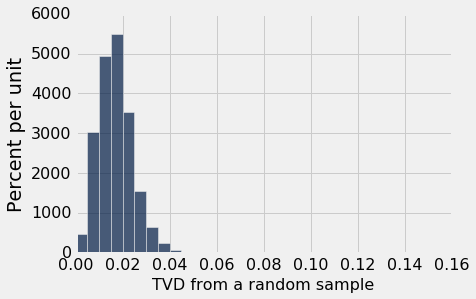

In [24]:
tvds.hist(bins=np.arange(0, 0.15, 0.005))

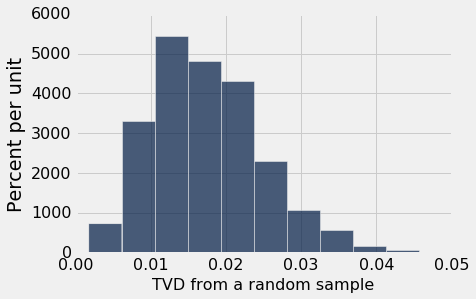

In [25]:
def tvd_distribution(sample_size, distribution):
    tvds = Table(["TVD from a random sample"])
    for i in np.arange(1000):
        sample = np.random.multinomial(sample_size, distribution) 
        tvd = total_variation_distance(sample / sample_size, distribution)
        tvds.append([tvd])
    return tvds

tvd_distribution(sample_size, eligible).hist()

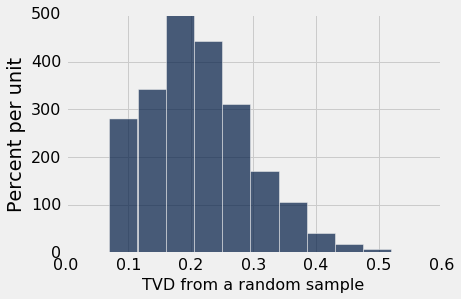

In [26]:
tvd_distribution(10, eligible).hist()

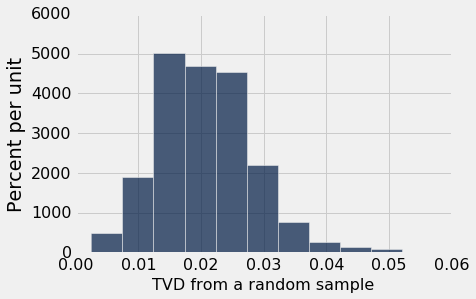

In [27]:
tvd_distribution(sample_size, [0.2, 0.2, 0.2, 0.2, 0.2]).hist()

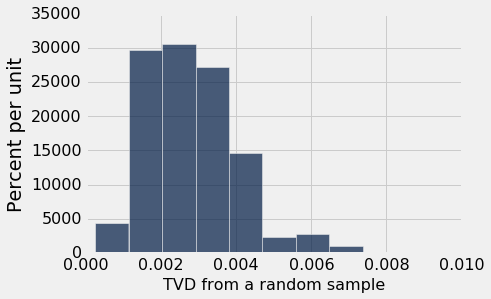

In [48]:
tvd_distribution(sample_size, [0.992, 0.002, 0.002, 0.002, 0.002]).hist()

## Chi-Squared

In [40]:
panel = jury.column("Panel")

In [41]:
sum((eligible - panel) ** 2 / eligible) * sample_size

348.07422222222226

In [42]:
def chi_squared(dist, other, sample_size):
    return sum((dist - other) ** 2 / dist) * sample_size
chi_squared(eligible, panel, sample_size)

348.07422222222226

In [49]:
stats = Table(["'Chi-squared' statistic, from a random sample"])
for i in np.arange(1000):
    sample = np.random.multinomial(sample_size, eligible)
    stat = chi_squared(eligible, sample / sample_size, sample_size)
    stats.append([stat])
stats

"'Chi-squared' statistic, from a random sample"
2.03033
4.6669
1.39716
3.05758
1.25493
2.32818
3.90449
1.36887
3.66641
9.59897


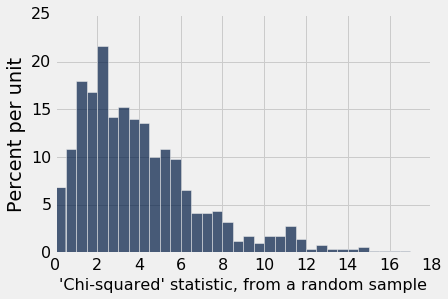

In [50]:
stats.hist(bins=np.arange(0, 18, 0.5))

In [51]:
np.mean(stats.column(0))

4.0519293415921087